In [4]:
#Import bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import tensorflow as tf
from tensorflow import keras

In [5]:
#Wczytujemy dane, usuwamy niepotrzebne kolumny
df = pd.read_csv("Jan_2019_ontime.csv")
df=df.drop(columns=['Unnamed: 21' , 'OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID' , 'OP_CARRIER_FL_NUM','ARR_TIME','ARR_DEL15','CANCELLED',"DIVERTED"])
# Zmieniamy nazwę kolumny której wartość będziemy przewidywać
df=df.rename( columns={'DEP_DEL15' : 'target'})

In [6]:
df.head(15)

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,target,DEP_TIME_BLK,DISTANCE
0,1,2,GNV,ATL,601.0,0.0,0600-0659,300.0
1,1,2,MSP,CVG,1359.0,0.0,1400-1459,596.0
2,1,2,DTW,CVG,1215.0,0.0,1200-1259,229.0
3,1,2,TLH,ATL,1521.0,0.0,1500-1559,223.0
4,1,2,ATL,FSM,1847.0,0.0,1900-1959,579.0
5,1,2,DAY,MSP,853.0,0.0,0900-0959,574.0
6,1,2,JAN,ATL,1553.0,0.0,1500-1559,341.0
7,1,2,LGA,CVG,1551.0,0.0,1500-1559,585.0
8,1,2,JAX,LGA,1037.0,0.0,1000-1059,833.0
9,1,2,ATL,BMI,1245.0,0.0,1200-1259,533.0


In [7]:
#Label Encoding kategorii w DataFrame
x=df['ORIGIN'].value_counts()
item_type_mapping={}
item_list=x.index
for i in range(0,len(item_list)):
    item_type_mapping[item_list[i]]=i

df['ORIGIN']=df['ORIGIN'].map(lambda x:item_type_mapping[x]) 

x=df['DEST'].value_counts()
item_type_mapping={}
item_list=x.index
for i in range(0,len(item_list)):
    item_type_mapping[item_list[i]]=i

df['DEST']=df['DEST'].map(lambda x:item_type_mapping[x]) 

x=df['DEP_TIME_BLK'].value_counts()
item_type_mapping={}
item_list=x.index
for i in range(0,len(item_list)):
    item_type_mapping[item_list[i]]=i

df['DEP_TIME_BLK']=df['DEP_TIME_BLK'].map(lambda x:item_type_mapping[x]) 
df.head(15)

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,target,DEP_TIME_BLK,DISTANCE
0,1,2,148,0,601.0,0.0,0,300.0
1,1,2,11,45,1359.0,0.0,7,596.0
2,1,2,12,45,1215.0,0.0,4,229.0
3,1,2,127,0,1521.0,0.0,6,223.0
4,1,2,0,208,1847.0,0.0,13,579.0
5,1,2,86,11,853.0,0.0,11,574.0
6,1,2,108,0,1553.0,0.0,6,341.0
7,1,2,8,45,1551.0,0.0,6,585.0
8,1,2,49,8,1037.0,0.0,8,833.0
9,1,2,0,180,1245.0,0.0,4,533.0


In [8]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,target,DEP_TIME_BLK,DISTANCE
count,583985.000000,583985.000000,583985.000000,583985.000000,567633.000000,567630.000000,583985.000000,583985.000000
mean,15.960088,3.835626,35.292305,35.287802,1331.957814,0.174281,7.434551,797.742767
std,8.987942,1.921899,48.371975,48.362274,495.404020,0.379351,4.875672,589.999261
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,31.000000
25%,8.000000,2.000000,6.000000,6.000000,921.000000,0.000000,3.000000,363.000000
50%,16.000000,4.000000,18.000000,18.000000,1328.000000,0.000000,7.000000,640.000000
75%,24.000000,5.000000,43.000000,43.000000,1738.000000,0.000000,11.000000,1037.000000
max,31.000000,7.000000,345.000000,345.000000,2400.000000,1.000000,18.000000,4983.000000


In [9]:
abs(df.corr().sort_values(by='target'))

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,target,DEP_TIME_BLK,DISTANCE
ORIGIN,0.002154,0.005811,1.000000,0.160222,0.123557,0.017496,0.078366,0.184551
DAY_OF_WEEK,0.031008,1.000000,0.005811,0.006193,0.003695,0.003223,0.000138,0.018932
DEST,0.002343,0.006193,0.160222,1.000000,0.126183,0.001170,0.113854,0.185128
DISTANCE,0.020388,0.018932,0.184551,0.185128,0.027002,0.011619,0.017778,1.000000
DAY_OF_MONTH,1.000000,0.031008,0.002154,0.002343,0.001552,0.027989,0.011822,0.020388
DEP_TIME_BLK,0.011822,0.000138,0.078366,0.113854,0.551748,0.073802,1.000000,0.017778
DEP_TIME,0.001552,0.003695,0.123557,0.126183,1.000000,0.190625,0.551748,0.027002
target,0.027989,0.003223,0.017496,0.001170,0.190625,1.000000,0.073802,0.011619


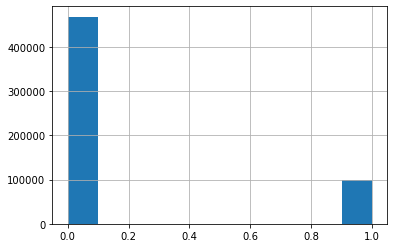

In [10]:
df['target'].hist()

In [11]:
# Funkcja do oczyszczania zestawu danych z wartości NaN, Inf oraz brakujących komórek (dla zestawów danych o skośnym rozkładzie):
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]
df=clean_dataset(df)

In [12]:
X = df.drop('target',axis=1)
y = df['target']

In [13]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, stratify=y, random_state=47)
X_train_2, X_test_2, y_train_2, y_test_2 = ms.train_test_split(X,y, stratify=y, random_state=32)
X_train_3, X_test_3, y_train_3, y_test_3 = ms.train_test_split(X,y, stratify=y, random_state=24)

In [11]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(450, activation="relu"),
    keras.layers.Dense(350, activation="relu"),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

In [12]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 450)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 350)               157850    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               87750     
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               37650     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 302       
Total params: 349,902
Trainable params: 349,902
Non-trainable params: 0
__________________________________________________

In [14]:
y_train.value_counts()

0.0    351527
1.0     74195
Name: target, dtype: int64

In [15]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
13304/13304 [==============================] - 31s 2ms/step - loss: 0.6685 - accuracy: 0.8165 - val_loss: 0.4397 - val_accuracy: 0.8262
Epoch 2/150
13304/13304 [==============================] - 29s 2ms/step - loss: 0.4369 - accuracy: 0.8272 - val_loss: 0.4350 - val_accuracy: 0.8265
Epoch 3/150
13304/13304 [==============================] - 29s 2ms/step - loss: 0.4346 - accuracy: 0.8269 - val_loss: 0.4356 - val_accuracy: 0.8264
Epoch 4/150
13304/13304 [==============================] - 31s 2ms/step - loss: 0.4331 - accuracy: 0.8286 - val_loss: 0.4237 - val_accuracy: 0.8364
Epoch 5/150
13304/13304 [==============================] - 34s 3ms/step - loss: 0.4275 - accuracy: 0.8321 - val_loss: 0.4168 - val_accuracy: 0.8395
Epoch 6/150
13304/13304 [==============================] - 34s 3ms/step - loss: 0.4221 - accuracy: 0.8355 - val_loss: 0.4411 - val_accuracy: 0.8274
Epoch 7/150
13304/13304 [==============================] - 29s 2ms/step - loss: 0.4203 - accuracy: 0.8362 - val_

13304/13304 [==============================] - 33s 2ms/step - loss: 0.2874 - accuracy: 0.9009 - val_loss: 0.2635 - val_accuracy: 0.9108
Epoch 57/150
13304/13304 [==============================] - 29s 2ms/step - loss: 0.2833 - accuracy: 0.9033 - val_loss: 0.2594 - val_accuracy: 0.9146
Epoch 58/150
13304/13304 [==============================] - 29s 2ms/step - loss: 0.2849 - accuracy: 0.9028 - val_loss: 0.2765 - val_accuracy: 0.9032
Epoch 59/150
13304/13304 [==============================] - 30s 2ms/step - loss: 0.2835 - accuracy: 0.9037 - val_loss: 0.2664 - val_accuracy: 0.9148
Epoch 60/150
13304/13304 [==============================] - 29s 2ms/step - loss: 0.2788 - accuracy: 0.9052 - val_loss: 0.2652 - val_accuracy: 0.9132
Epoch 61/150
13304/13304 [==============================] - 30s 2ms/step - loss: 0.2790 - accuracy: 0.9059 - val_loss: 0.3022 - val_accuracy: 0.9021
Epoch 62/150
13304/13304 [==============================] - 29s 2ms/step - loss: 0.2755 - accuracy: 0.9067 - val_loss: 

Epoch 111/150
13304/13304 [==============================] - 28s 2ms/step - loss: 0.2559 - accuracy: 0.9155 - val_loss: 0.2506 - val_accuracy: 0.9212
Epoch 112/150
13304/13304 [==============================] - 28s 2ms/step - loss: 0.2535 - accuracy: 0.9168 - val_loss: 0.2448 - val_accuracy: 0.9181
Epoch 113/150
13304/13304 [==============================] - 29s 2ms/step - loss: 0.2548 - accuracy: 0.9157 - val_loss: 0.2408 - val_accuracy: 0.9228
Epoch 114/150
13304/13304 [==============================] - 29s 2ms/step - loss: 0.2546 - accuracy: 0.9160 - val_loss: 0.2484 - val_accuracy: 0.9177
Epoch 115/150
13304/13304 [==============================] - 28s 2ms/step - loss: 0.2546 - accuracy: 0.9163 - val_loss: 0.2454 - val_accuracy: 0.9188
Epoch 116/150
13304/13304 [==============================] - 28s 2ms/step - loss: 0.2555 - accuracy: 0.9162 - val_loss: 0.2401 - val_accuracy: 0.9217
Epoch 117/150
13304/13304 [==============================] - 28s 2ms/step - loss: 0.2523 - accuracy:

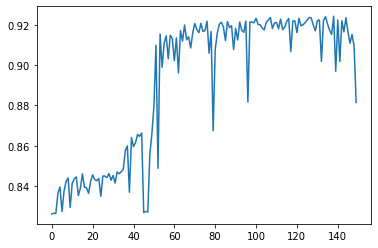

In [16]:
plt.plot(history.history["val_accuracy"])

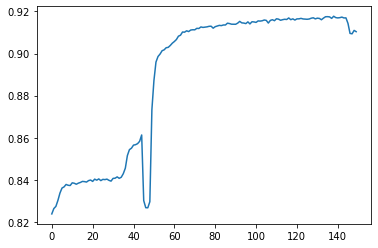

In [17]:
plt.plot(history.history["accuracy"])

In [14]:
model_2 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_2.shape[1]),
    keras.layers.Dense(450, activation="elu"),
    keras.layers.Dense(350, activation="elu"),
    keras.layers.Dense(250, activation="elu"),
    keras.layers.Dense(250, activation="elu"),
    keras.layers.Dense(150, activation="elu"),
    keras.layers.Dense(2, activation="softmax")
])

model_2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adamax",
    metrics=["accuracy"]
)

model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 450)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 350)               157850    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               87750     
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               37650     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 302       
Total params: 349,902
Trainable params: 349,902
Non-trainable params: 0
__________________________________________________

In [15]:
history2 = model_2.fit(X_train_2, y_train_2, epochs=150, validation_data=(X_test_2, y_test_2))

Epoch 1/150
13304/13304 [==============================] - 60s 4ms/step - loss: 0.6284 - accuracy: 0.8069 - val_loss: 0.4495 - val_accuracy: 0.8235
Epoch 2/150
13304/13304 [==============================] - 34s 3ms/step - loss: 0.4356 - accuracy: 0.8272 - val_loss: 0.4246 - val_accuracy: 0.8346
Epoch 3/150
13304/13304 [==============================] - 34s 3ms/step - loss: 0.4202 - accuracy: 0.8362 - val_loss: 0.3985 - val_accuracy: 0.8469
Epoch 4/150
13304/13304 [==============================] - 34s 3ms/step - loss: 0.3833 - accuracy: 0.8535 - val_loss: 0.3212 - val_accuracy: 0.8932
Epoch 5/150
13304/13304 [==============================] - 34s 3ms/step - loss: 0.3120 - accuracy: 0.8887 - val_loss: 0.3124 - val_accuracy: 0.8907
Epoch 6/150
13304/13304 [==============================] - 34s 3ms/step - loss: 0.2798 - accuracy: 0.9039 - val_loss: 0.2791 - val_accuracy: 0.9021
Epoch 7/150
13304/13304 [==============================] - 35s 3ms/step - loss: 0.2652 - accuracy: 0.9095 - val_

13304/13304 [==============================] - 35s 3ms/step - loss: 0.2226 - accuracy: 0.9272 - val_loss: 0.2156 - val_accuracy: 0.9287
Epoch 57/150
13304/13304 [==============================] - 37s 3ms/step - loss: 0.2222 - accuracy: 0.9272 - val_loss: 0.2175 - val_accuracy: 0.9279
Epoch 58/150
13304/13304 [==============================] - 35s 3ms/step - loss: 0.2234 - accuracy: 0.9267 - val_loss: 0.2211 - val_accuracy: 0.9276
Epoch 59/150
13304/13304 [==============================] - 38s 3ms/step - loss: 0.2226 - accuracy: 0.9269 - val_loss: 0.2491 - val_accuracy: 0.9150
Epoch 60/150
13304/13304 [==============================] - 35s 3ms/step - loss: 0.2223 - accuracy: 0.9268 - val_loss: 0.2140 - val_accuracy: 0.9290
Epoch 61/150
13304/13304 [==============================] - 35s 3ms/step - loss: 0.2230 - accuracy: 0.9267 - val_loss: 0.2248 - val_accuracy: 0.9273
Epoch 62/150
13304/13304 [==============================] - 35s 3ms/step - loss: 0.2216 - accuracy: 0.9273 - val_loss: 

Epoch 111/150
13304/13304 [==============================] - 31s 2ms/step - loss: 0.2192 - accuracy: 0.9277 - val_loss: 0.2328 - val_accuracy: 0.9267
Epoch 112/150
13304/13304 [==============================] - 32s 2ms/step - loss: 0.2186 - accuracy: 0.9276 - val_loss: 0.2157 - val_accuracy: 0.9287
Epoch 113/150
13304/13304 [==============================] - 31s 2ms/step - loss: 0.2186 - accuracy: 0.9278 - val_loss: 0.2146 - val_accuracy: 0.9290
Epoch 114/150
13304/13304 [==============================] - 32s 2ms/step - loss: 0.2198 - accuracy: 0.9270 - val_loss: 0.2147 - val_accuracy: 0.9289
Epoch 115/150
13304/13304 [==============================] - 32s 2ms/step - loss: 0.2208 - accuracy: 0.9267 - val_loss: 0.2280 - val_accuracy: 0.9271
Epoch 116/150
13304/13304 [==============================] - 32s 2ms/step - loss: 0.2198 - accuracy: 0.9273 - val_loss: 0.2118 - val_accuracy: 0.9290
Epoch 117/150
13304/13304 [==============================] - 32s 2ms/step - loss: 0.2185 - accuracy:

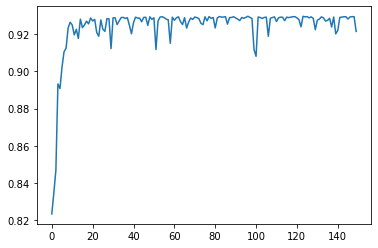

In [16]:
plt.plot(history2.history["val_accuracy"])

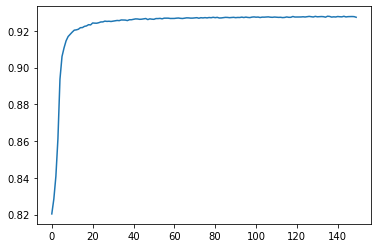

In [17]:
plt.plot(history2.history["accuracy"])

In [18]:
model_3 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_3.shape[1]),
    keras.layers.Dense(450, activation="selu"),
    keras.layers.Dense(350, activation="selu"),
    keras.layers.Dense(250, activation="selu"),
    keras.layers.Dense(250, activation="selu"),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(2, activation="softmax")
])

model_3.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="nadam",
    metrics=["accuracy"]
)

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 450)               3600      
_________________________________________________________________
dense_7 (Dense)              (None, 350)               157850    
_________________________________________________________________
dense_8 (Dense)              (None, 250)               87750     
_________________________________________________________________
dense_9 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 302       
Total params: 349,902
Trainable params: 349,902
Non-trainable params: 0
________________________________________________

In [19]:
history3 = model_3.fit(X_train_3, y_train_3, epochs=150, validation_data=(X_test_3, y_test_3))

Epoch 1/150
13304/13304 [==============================] - 47s 3ms/step - loss: 0.7316 - accuracy: 0.8159 - val_loss: 0.4399 - val_accuracy: 0.8265
Epoch 2/150
13304/13304 [==============================] - 42s 3ms/step - loss: 0.4417 - accuracy: 0.8261 - val_loss: 0.4343 - val_accuracy: 0.8267
Epoch 3/150
13304/13304 [==============================] - 43s 3ms/step - loss: 0.4350 - accuracy: 0.8295 - val_loss: 0.4158 - val_accuracy: 0.8411
Epoch 4/150
13304/13304 [==============================] - 39s 3ms/step - loss: 0.4127 - accuracy: 0.8430 - val_loss: 0.3804 - val_accuracy: 0.8572
Epoch 5/150
13304/13304 [==============================] - 40s 3ms/step - loss: 0.3919 - accuracy: 0.8532 - val_loss: 0.3434 - val_accuracy: 0.8795
Epoch 6/150
13304/13304 [==============================] - 43s 3ms/step - loss: 0.3597 - accuracy: 0.8697 - val_loss: 0.5580 - val_accuracy: 0.8783
Epoch 7/150
13304/13304 [==============================] - 47s 4ms/step - loss: 0.3935 - accuracy: 0.8793 - val_

13304/13304 [==============================] - 48s 4ms/step - loss: 0.2422 - accuracy: 0.9216 - val_loss: 0.2756 - val_accuracy: 0.9131
Epoch 57/150
13304/13304 [==============================] - 50s 4ms/step - loss: 0.2441 - accuracy: 0.9211 - val_loss: 0.2666 - val_accuracy: 0.9115
Epoch 58/150
13304/13304 [==============================] - 49s 4ms/step - loss: 0.2438 - accuracy: 0.9211 - val_loss: 0.2571 - val_accuracy: 0.9207
Epoch 59/150
13304/13304 [==============================] - 49s 4ms/step - loss: 0.2425 - accuracy: 0.9207 - val_loss: 0.2724 - val_accuracy: 0.9096
Epoch 60/150
13304/13304 [==============================] - 47s 4ms/step - loss: 0.2404 - accuracy: 0.9223 - val_loss: 0.2387 - val_accuracy: 0.9223
Epoch 61/150
13304/13304 [==============================] - 39s 3ms/step - loss: 0.2396 - accuracy: 0.9231 - val_loss: 0.2422 - val_accuracy: 0.9188
Epoch 62/150
13304/13304 [==============================] - 40s 3ms/step - loss: 0.2415 - accuracy: 0.9217 - val_loss: 

Epoch 111/150
13304/13304 [==============================] - 40s 3ms/step - loss: 0.3532 - accuracy: 0.8839 - val_loss: 0.3330 - val_accuracy: 0.8911
Epoch 112/150
13304/13304 [==============================] - 40s 3ms/step - loss: 0.3550 - accuracy: 0.8831 - val_loss: 0.5611 - val_accuracy: 0.8401
Epoch 113/150
13304/13304 [==============================] - 40s 3ms/step - loss: 0.4083 - accuracy: 0.8553 - val_loss: 0.3753 - val_accuracy: 0.8693
Epoch 114/150
13304/13304 [==============================] - 45s 3ms/step - loss: 0.3469 - accuracy: 0.8818 - val_loss: 0.3378 - val_accuracy: 0.8827
Epoch 115/150
13304/13304 [==============================] - 49s 4ms/step - loss: 0.3273 - accuracy: 0.8894 - val_loss: 0.3284 - val_accuracy: 0.8897
Epoch 116/150
13304/13304 [==============================] - 49s 4ms/step - loss: 0.3147 - accuracy: 0.8929 - val_loss: 0.3018 - val_accuracy: 0.8965
Epoch 117/150
13304/13304 [==============================] - 40s 3ms/step - loss: 0.3014 - accuracy:

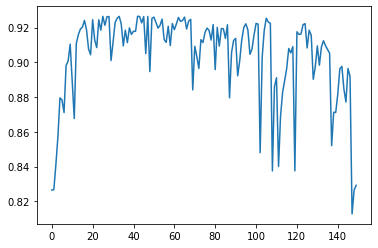

In [20]:
plt.plot(history3.history["val_accuracy"])

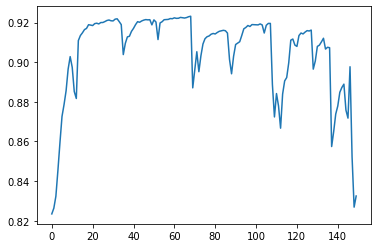

In [21]:
plt.plot(history3.history["accuracy"])